## Quantitation of AT2-KRAS organoids treated with small molecules

### 100 nM graphs and statistics

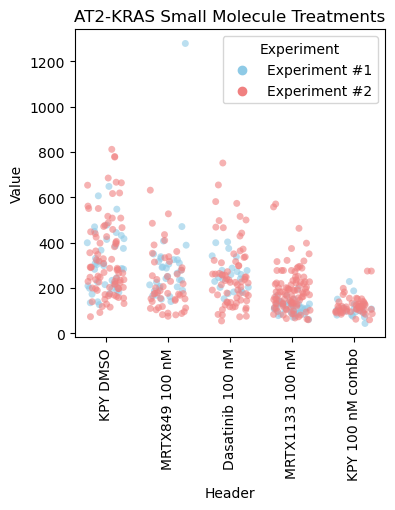

Comparison: KPY DMSO vs. MRTX849 100 nM
Wilcoxon rank-sum statistic: 3.521471060241095
P-value: 0.0004291595081616561
Comparison: KPY DMSO vs. Dasatinib 100 nM
Wilcoxon rank-sum statistic: 3.105830545864268
P-value: 0.00189745417259166
Comparison: KPY DMSO vs. MRTX1133 100 nM
Wilcoxon rank-sum statistic: 9.252650630809372
P-value: 2.1899327849044607e-20
Comparison: KPY DMSO vs. KPY 100 nM combo
Wilcoxon rank-sum statistic: 10.405234276249747
P-value: 2.3467812499813996e-25
Comparison: MRTX1133 100 nM vs. KPY 100 nM combo
Wilcoxon rank-sum statistic: 4.735536462167819
P-value: 2.1847642010792165e-06
Comparison: Dasatinib 100 nM vs. KPY 100 nM combo
Wilcoxon rank-sum statistic: 8.204066767037546
P-value: 2.323889370149036e-16


In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ranksums

# Define a function to filter and merge data based on conditions
def prepare_data(df_long, header1, header2, exp1_label, exp2_label):
    # Filter the data for the desired samples and experiments
    sample1_exp1 = df_long.loc[(df_long['Header'] == header1) & (df_long['Experiment'] == exp1_label), 'Value']
    sample1_exp2 = df_long.loc[(df_long['Header'] == header1) & (df_long['Experiment'] == exp2_label), 'Value']
    sample2_exp1 = df_long.loc[(df_long['Header'] == header2) & (df_long['Experiment'] == exp1_label), 'Value']
    sample2_exp2 = df_long.loc[(df_long['Header'] == header2) & (df_long['Experiment'] == exp2_label), 'Value']

    # Filter out NaN values and merge
    return pd.concat([sample1_exp1, sample1_exp2]).dropna(), pd.concat([sample2_exp1, sample2_exp2]).dropna()

# Define a function for statistical testing
def perform_test(sample1, sample2, comparison_name):
    statistic, p_value = ranksums(sample1, sample2)
    print(f"Comparison: {comparison_name}")
    print(f"Wilcoxon rank-sum statistic: {statistic}")
    print(f"P-value: {p_value}")

# Load and process data
path = "path/to/files"
df1 = pd.read_excel(f'{path}/AT2-KRAS organoid quants (n=2).xlsx', sheet_name=0)
df2 = pd.read_excel(f'{path}/AT2-KRAS organoid quants (n=2).xlsx', sheet_name=1)

df1 = df1.filter(regex='^(?!.*10 nM)')
df2 = df2.filter(regex='^(?!.*10 nM)')
df1['Experiment'] = 'Experiment #1'
df2['Experiment'] = 'Experiment #2'
df = pd.concat([df1, df2])
df_long = df.melt(id_vars='Experiment', var_name='Header', value_name='Value')

# Plotting
plt.figure(figsize=(4,4))
sns.stripplot(data=df_long, x='Header', y='Value', hue='Experiment', jitter=0.3, size=5, alpha=0.6, palette=['#8ecae6','lightcoral'])
plt.title('AT2-KRAS Small Molecule Treatments')
plt.xticks(rotation=90)
plt.show()

# Define comparisons
comparisons = [
    ('KPY DMSO', 'MRTX849 100 nM'),
    ('KPY DMSO', 'Dasatinib 100 nM'),
    ('KPY DMSO', 'MRTX1133 100 nM'),
    ('KPY DMSO', 'KPY 100 nM combo'),
    ('MRTX1133 100 nM', 'KPY 100 nM combo'),
    ('Dasatinib 100 nM', 'KPY 100 nM combo')
]

# Perform comparisons
for header1, header2 in comparisons:
    sample1, sample2 = prepare_data(df_long, header1, header2, 'Experiment #1', 'Experiment #2')
    perform_test(sample1, sample2, f"{header1} vs. {header2}")